In [393]:
!pip install kagglehub --quiet

In [394]:
import pandas as pd 
import kagglehub as kh
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [395]:
# Download latest version
path = kh.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hawra\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1


In [396]:
# Show the actual downloaded files
print("Files in dataset folder:")
print(os.listdir(path))

Files in dataset folder:
['mitbih_test.csv', 'mitbih_train.csv', 'ptbdb_abnormal.csv', 'ptbdb_normal.csv']


In [397]:
def load_data(path):
    # load data from mitbih
    mitbih_train = pd.read_csv(os.path.join(path, "mitbih_train.csv"), header=None)
    mitbih_test = pd.read_csv(os.path.join(path, "mitbih_test.csv"), header=None)

    # load data from ptbdb
    ptbdb_normal = pd.read_csv(os.path.join(path, "ptbdb_normal.csv"), header=None)
    ptbdb_abnormal = pd.read_csv(os.path.join(path, "ptbdb_abnormal.csv"), header=None)
    # Combine ptbdb
   # ptbdb_data = pd.concat([ptbdb_normal, ptbdb_abnormal], ignore_index=True)

  
    return mitbih_train, mitbih_test, ptbdb_normal, ptbdb_abnormal

In [398]:
mitbih_train, mitbih_test, ptbdb_normal, ptbdb_abnormal = load_data(path)

In [399]:
def replace_label_column(data, label):
    data.iloc[:, -1] = label  # Replace the last column with the new label
    return data

In [400]:
# function to append labels to ptbdb data to show normal and abnormal
# def append_labels(data, label):
#     # Append labels to the data
#     data['label'] = label
#     return data

In [401]:
# append labels to ptbdb data
ptbdb_normal = replace_label_column(ptbdb_normal, 6) # normal
ptbdb_abnormal = replace_label_column(ptbdb_abnormal, 7) # abnormal


In [428]:
ptbdb_all = pd.concat([ptbdb_normal, ptbdb_abnormal], ignore_index=True)

# split the data 80 20 

X_ptbdb_train, X_ptbdb_test, y_ptbdb_train, y_ptbdb_test = train_test_split(ptbdb_all.iloc[:, :-1], ptbdb_all.iloc[:, -1], test_size=0.2, random_state=42)


In [429]:
# combine mitbih and ptbdb data
X_train = pd.concat([X_ptbdb_train, mitbih_train.iloc[:, :-1]], ignore_index=True)

In [434]:
X_test = pd.concat([X_ptbdb_test, mitbih_test.iloc[:, :-1]], ignore_index=True)

In [430]:
y_test = pd.concat([y_ptbdb_test, mitbih_test.iloc[:, -1]], ignore_index=True)

In [462]:
y_test.head()

0    6.0
1    7.0
2    7.0
3    7.0
4    7.0
Name: 187, dtype: float64

In [433]:
y_train = pd.concat([y_ptbdb_train, mitbih_train.iloc[:, -1]], ignore_index=True)

In [463]:
y_train.head()

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
Name: 187, dtype: float64

In [ ]:
# def split_data(mitbih_train, mitbih_test, ptbdb_normal, ptbdb_abnormal):
#     # Split mitbih
#     X_mit_train = mitbih_train.iloc[:, :-1]
#     y_mit_train = mitbih_train.iloc[:, -1]
#     X_mit_test = mitbih_test.iloc[:, :-1]
#     y_mit_test = mitbih_test.iloc[:, -1]

    # Split ptbdb
    # X_ptb = pd.concat([ptbdb_normal, ptbdb_abnormal], ignore_index=True).iloc[:, :-1]
    # y_ptb is the output label of ptbdb data
    # y_ptb = X_ptb.iloc[:, -1]
   # ptbdb_all = pd.concat([ptbdb_normal, ptbdb_abnormal], ignore_index=True)
    # X_ptb = ptbdb_all.iloc[:, :-1]
    # y_ptb = ptbdb_all.iloc[:, -1]

    # return X_mit_train, y_mit_train, X_mit_test, y_mit_test, X_ptb, y_ptb

In [ ]:
# X_mit_train, y_mit_train,  X_mit_test, y_mit_test, X_ptb, y_ptb = split_data(mitbih_train, mitbih_test, ptbdb_normal, ptbdb_abnormal)

# print("MITBIH train:", X_mit_train.shape, y_mit_train.shape)
# print("MITBIH test :", X_mit_test.shape, y_mit_test.shape)
# print("PTBDB       :", X_ptb.shape, y_ptb.shape)

MITBIH train: (87554, 187) (87554,)
MITBIH test : (21892, 187) (21892,)
PTBDB       : (14552, 187) (14552,)


In [435]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.995160,0.841500,0.841500,0.787659,0.695705,0.650333,0.638838,0.649123,0.629764,0.601936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.977044,0.896976,0.487122,0.430571,0.372900,0.325308,0.320829,0.339306,0.342665,0.374020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.313459,0.239669,0.502361,0.427981,0.352420,0.253247,0.242621,0.262692,0.259740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.951319,0.496360,0.299818,0.233849,0.121474,0.074613,0.088717,0.065969,0.062784,0.059600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.992788,0.950120,0.634615,0.350962,0.268630,0.179087,0.137019,0.109976,0.112380,0.108173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [437]:
y_train.head()

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
Name: 187, dtype: float64

In [438]:
print("Original shape:", X_train.shape)

Original shape: (99195, 187)


In [439]:
def drop_almost_zero_columns(X, threshold=0.8):
    zero_fraction = (X == 0).sum() / len(X)
    drop_cols = zero_fraction[zero_fraction >= threshold].index
    print(f"Dropping {len(drop_cols)} columns with ≥{threshold*100}% zeros")
    return X.drop(columns=drop_cols)

In [447]:
# drop the columns with all zeros from the train and test datasets
X_train = drop_almost_zero_columns(X_train)

Dropping 54 columns with ≥80.0% zeros


In [467]:
X_test = drop_almost_zero_columns(X_test)

Dropping 54 columns with ≥80.0% zeros


In [468]:
zero_fraction = (X_train == 0).sum() / len(X_train)
zero_fraction_sorted = zero_fraction.sort_values(ascending=False)
print(zero_fraction_sorted.head(20))  # top 20 most-zero columns


132    0.793014
131    0.785372
130    0.778285
129    0.769333
128    0.760048
127    0.750451
126    0.739201
125    0.726135
124    0.714361
123    0.700055
122    0.684994
121    0.668179
120    0.650890
119    0.634578
118    0.619890
117    0.603982
116    0.589364
115    0.576219
114    0.563889
113    0.551258
dtype: float64


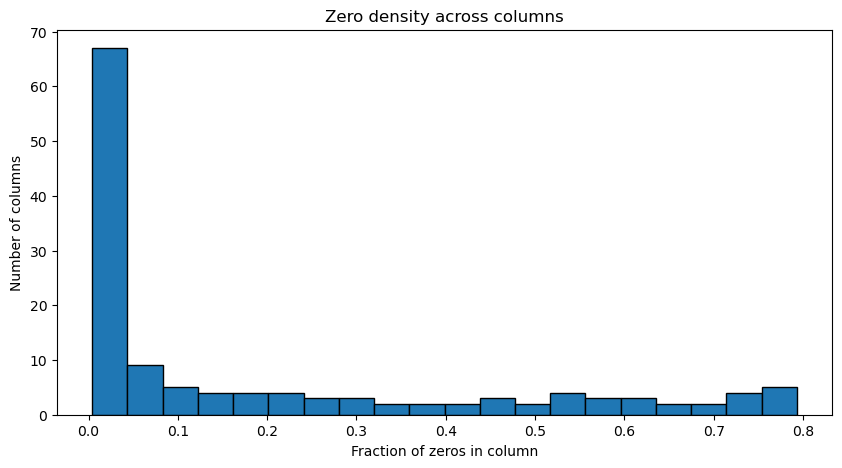

In [469]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(zero_fraction, bins=20, edgecolor='k')
plt.xlabel("Fraction of zeros in column")
plt.ylabel("Number of columns")
plt.title("Zero density across columns")
plt.show()

In [470]:
zero_cols = X_train.columns[(X_train == 0).all(axis=0)]
print("Columns with all zeros:", zero_cols.tolist())
print("Count:", len(zero_cols))

Columns with all zeros: []
Count: 0


In [471]:
print("Cleaned shape:", X_train.shape)

Cleaned shape: (99195, 133)


In [472]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.995160,0.841500,0.841500,0.787659,0.695705,0.650333,0.638838,0.649123,0.629764,0.601936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.977044,0.896976,0.487122,0.430571,0.372900,0.325308,0.320829,0.339306,0.342665,0.374020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.313459,0.239669,0.502361,0.427981,0.352420,0.253247,0.242621,0.262692,0.259740,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.951319,0.496360,0.299818,0.233849,0.121474,0.074613,0.088717,0.065969,0.062784,0.059600,...,0.352138,0.737944,1.000000,0.605096,0.367607,0.233849,0.154686,0.081893,0.093267,0.070974
4,0.992788,0.950120,0.634615,0.350962,0.268630,0.179087,0.137019,0.109976,0.112380,0.108173,...,0.136418,0.141827,0.144231,0.153846,0.160457,0.179087,0.191707,0.000000,0.000000,0.000000


In [473]:
y_train.head()

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
Name: 187, dtype: float64

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [475]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.24843768898923518
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.17      0.29     18118
         1.0       0.13      0.49      0.21       556
         2.0       0.23      0.45      0.31      1448
         3.0       0.03      0.95      0.05       162
         4.0       0.49      0.72      0.59      1608
         6.0       0.09      0.70      0.15       834
         7.0       0.11      0.09      0.10      2077

    accuracy                           0.25     24803
   macro avg       0.28      0.51      0.24     24803
weighted avg       0.71      0.25      0.29     24803

Confusion Matrix:
 [[3169 1548 1606 4787  844 5123 1041]
 [  38  273   45  117   14   62    7]
 [  95   77  648  193  154  130  151]
 [   4    0    3  154    0    0    1]
 [  79   16   36   26 1153   82  216]
 [  24   64   58   71   16  585   16]
 [ 168  109  373  315  152  780  180]]
